In [501]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 
# import plotly.express as px
# import plotly.io as pio

import sys
sys.path.append("../scripts")
from TrackReconstruction_functions import *
from reconstruction_functions import *



In [502]:
# diff = "nodiff"
diff = "5percent"
# diff = "0.25percent"
# diff = "0.1percent"
# diff = "0.05percent"
# diff = "0.0percent"
pressure = 25

# Set the detector size depending on the pressure
density = 5.987*pressure
M = 1000/0.9
det_size = 1000*np.cbrt((4 * M) / (np.pi * density))/2.0
print(det_size)

# Load in the signal metadata
nubb_meta = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_{pressure}bar_{diff}_reco.h5", "meta")
nubb_meta["Type"] = "0nubb"
display(nubb_meta)

# ----------------------------------------------------------------------------------------------------

# Load in the background
Bkg_meta = pd.DataFrame()
Tl_meta = pd.DataFrame()
Bi_meta = pd.DataFrame()

Tl_meta = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_{pressure}bar_{diff}_reco.h5", "meta")
Tl_meta["Type"] = "Tl"
Bi_meta = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_{pressure}bar_{diff}_reco.h5", "meta")
Bi_meta["Type"] = "Bi"
single_meta = pd.read_hdf(f"../data/Trackreco/ATPC_single_{pressure}bar_{diff}_reco.h5", "meta")
single_meta["Type"] = "single"

Bkg_meta = pd.concat([Tl_meta, Bi_meta, single_meta])
# Bkg_meta = pd.concat([Tl_meta])
display(Bkg_meta)

# ----------------------------------------------------------------------------------------------------
# Load in the files for plotting the background events

# Tl                = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_{pressure}bar_{diff}_reco.h5",    "data")
# Tl_true_hits      = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_{pressure}bar_nexus_filtered.h5", "MC/hits")
# Tl_true_parts     = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_{pressure}bar_nexus_filtered.h5", "MC/particles")

# Bi                = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_{pressure}bar_{diff}_reco.h5",    "data")
# Bi_true_hits      = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_{pressure}bar_nexus_filtered.h5", "MC/hits")
# Bi_true_parts     = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_{pressure}bar_nexus_filtered.h5", "MC/particles")

# Tl_diffused_hits  = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_{pressure}bar_{diff}_filtered.h5", "MC/hits")
# Bi_diffused_hits  = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_{pressure}bar_{diff}_filtered.h5", "MC/hits")


# Single              = pd.read_hdf(f"../data/Trackreco/ATPC_single_{pressure}bar_{diff}_reco.h5",    "data")

# Shift the positions
# Tl["Type"] = "Tl"
# Bi["Type"] = "Bi"
# Single["Type"] = "single"
# Tl_true_hits["z"] = Tl_true_hits["z"] + det_size
# Bi_true_hits["z"] = Bi_true_hits["z"] + det_size

# Bkg            =  pd.concat([Tl, Bi, Single])
# Bkg_true_hits  =  pd.concat([Tl_true_hits, Bi_true_hits])
# Bkg_true_parts =  pd.concat([Tl_true_parts, Bi_true_parts])
# Bkg_diffused_hits = pd.concat([Tl_diffused_hits])

# Bkg            =  pd.concat([Tl])
# Bkg_true_hits  =  pd.concat([Tl_true_hits])
# Bkg_true_parts =  pd.concat([Tl_true_parts])

# ----------------------------------------------------------------------------------------------------
# Load in the pickle files
# bi_file = f"../data/Trackreco/ATPC_Bi_{pressure}bar_{diff}_trackreco.pkl"
# tl_file = f"../data/Trackreco/ATPC_Tl_ion_{pressure}bar_{diff}_trackreco.pkl"

# # Load Bi data
# with open(bi_file, 'rb') as pickle_file:
#     Tracks_Bi = pickle.load(pickle_file)
#     connections_Bi = pickle.load(pickle_file)
#     connection_counts_Bi = pickle.load(pickle_file)

# Load Tl data
# with open(tl_file, 'rb') as pickle_file:
#     Tracks_Tl = pickle.load(pickle_file)
#     connections_Tl = pickle.load(pickle_file)
#     connection_counts_Tl = pickle.load(pickle_file)

# Merge dictionaries
# Bkg_Tracks = {**Tracks_Bi, **Tracks_Tl}
# Bkg_connections = {**connections_Bi, **connections_Tl}
# Bkg_connection_counts = {**connection_counts_Bi, **connection_counts_Tl}

# Bkg_Tracks = {**Tracks_Tl}
# Bkg_connections = {**connections_Tl}
# Bkg_connection_counts = {**connection_counts_Tl}

# ----------------------------------------------------------------------------------------------------




1057.1650214164088


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,blob1RTD,blob2RTD,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label,contained,Type
0,74,0,1,0,66,113.558,2.287149,0.742844,0.641340,0.727571,0.717076,0.727571,0.717076,4.756414,1.986971,3.452340,1.454798,Primary,True,0nubb
0,74,1,0,28,31,1.279,0.002807,0.002807,0.000000,0.002807,0.000000,0.015602,0.002807,0.000000,0.000000,0.000000,0.000000,Delta0,True,0nubb
0,74,2,0,73,73,0.000,0.001037,0.001037,0.001037,0.001037,0.001037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem,True,0nubb
0,74,3,0,46,47,1.156,0.026577,0.022051,0.004526,0.022051,0.004526,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,Brem,True,0nubb
0,74,4,0,74,75,1.123,0.021216,0.018687,0.002529,0.018687,0.002529,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,Brem,True,0nubb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,804,2,0,70,74,1.186,0.108447,0.108447,0.000000,0.108447,0.000000,0.108447,0.031893,0.000000,0.000000,0.000000,0.000000,Delta0,True,0nubb
0,804,3,0,52,52,0.000,0.021750,0.021750,0.021750,0.021750,0.021750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem,True,0nubb
0,804,4,0,56,67,2.378,0.028891,0.005198,0.000757,0.005198,0.000757,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,Brem,True,0nubb
0,805,0,1,22,23,93.948,2.458722,0.847071,0.818773,0.862200,0.721544,0.862200,0.721544,2.204840,1.415924,1.170232,0.679447,Primary,True,0nubb


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,blob1RTD,blob2RTD,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label,contained,Type
0,50006,0,1,30,34,70.168,1.458136,0.715685,0.260880,0.658457,0.631188,0.701736,0.658457,1.959787,1.947608,2.257318,1.704723,Primary,False,Tl
0,50006,1,0,18,6,6.539,0.074419,0.003870,0.000000,0.003870,0.000000,0.009375,0.003870,1.000000,1.000000,0.000000,0.000000,Delta0,False,Tl
0,50006,2,0,0,0,0.000,0.067809,0.067809,0.067809,0.067809,0.067809,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem,False,Tl
0,50006,3,0,1,1,0.000,0.004826,0.004826,0.004826,0.004826,0.004826,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem,False,Tl
0,50006,4,0,62,78,26.068,0.435654,0.019604,0.012491,0.065094,0.038529,0.000000,0.000000,2.233244,1.079658,1.306127,0.193627,Brem,False,Tl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,40962,1,0,18,25,7.124,0.000905,0.000506,0.000000,0.000506,0.000000,0.056123,0.000506,1.000000,1.000000,0.000000,0.000000,Delta0,True,single
0,40966,0,1,0,42,122.054,1.993051,0.696122,0.234039,0.635264,0.234039,0.635264,0.234039,2.293132,2.112573,1.633662,1.182960,Primary,True,single
0,40966,1,0,62,63,7.043,0.462546,0.019505,0.004941,0.019505,0.004941,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,Brem,True,single
0,40974,0,1,14,38,108.823,2.422262,0.647490,0.527952,0.591670,0.512129,0.591670,0.512129,2.036737,1.865039,1.066113,0.863559,Primary,True,single


In [503]:
nubb_events = len(nubb_meta.event_id.unique())
Bkg_events = len(Bkg_meta.event_id.unique())
Bi_events = len(Bi_meta.event_id.unique())
Tl_events = len(Tl_meta.event_id.unique())
single_events = len(single_meta.event_id.unique())

print("0vbb:", nubb_events)
print("Bkg:", Bkg_events)
print("Bi:", Bi_events)

sf_bkg = nubb_events/Bkg_events
sf_bi = nubb_events/Bi_events
sf_tl = nubb_events/Tl_events
sf_single = nubb_events/single_events
print("Bkg scale factor:", sf_bkg)
print("Bi scale factor:", sf_bi)
print("Tl scale factor:", sf_tl)
print("Single scale factor:", sf_single)

0vbb: 191502
Bkg: 794803
Bi: 396482
Bkg scale factor: 0.2409427241719017
Bi scale factor: 0.48300301148601954
Tl scale factor: 0.9017927358175148
Single scale factor: 1.0197993439270652


In [504]:
# Plot some variables like number of tracks
%matplotlib widget


def PlotDistributions(df_meta, col, label, pressure, diffusion, mode, Eres, scale_factor, axs, applycuts):

    print("Running cuts with")
    print("Pressure:",  pressure,"bar")
    print("Diffusion:", diffusion )

    uselog=True
    # uselog=False

    df_primary = df_meta[ (df_meta.label == "Primary") & (df_meta.primary == 1)]

    # Apply the cuts
    if applycuts:
        df_meta, df_primary, cuts = ApplyCuts(df_meta, df_primary, pressure, diffusion, mode, Eres)
        df_primary = df_primary[ cuts ]
        df_meta = df_meta[(df_meta.event_id.isin(df_primary.event_id.unique()))]

    event_energy = df_meta.groupby("event_id").energy.sum()

    df_counts      = GetNTracks(df_meta)
    df_counts_evts = df_counts[df_counts.N_tracks >= 1].event_id.unique()

    # Number of brems and deltas
    N_brem  = GetNParticles(df_meta, "Brem")
    N_delta = GetNParticles(df_meta, "Delta")

    # Dataframes containing brems and deltas
    deltas = GetDeltas(df_meta)
    brems  = GetBrems(df_meta)

    # This is the sum of the primary and delta energies attached to it
    trk_e = GetTrackDeltaEnergy(df_meta)

    # Calculate the ratio of x-rays to tracks
    # x_ray_ratio = df_meta.groupby("event_id").apply(compute_ratio).reset_index(name="ratio")


    weights        = np.ones_like(df_primary.energy)  * scale_factor
    weights_counts = np.ones_like(df_counts.N_tracks) * scale_factor
    weights_deltas = np.ones_like(deltas.energy)      * scale_factor
    weights_brem   = np.ones_like(brems.energy)       * scale_factor
    weights_Ndelta = np.ones_like(N_delta.N_Delta)    * scale_factor
    weights_Nbrem  = np.ones_like(N_brem.N_Brem)      * scale_factor
    weights_trke   = np.ones_like(trk_e)              * scale_factor
    weights_energy = np.ones_like(event_energy)       * scale_factor

    bin_edges = np.arange(-0.5, 7.5, 1)
    bin_centers = np.arange(0, 7, 1)

    # Multiplicities
    axs[0,0].hist(df_counts.N_tracks, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_counts);
    # axs[0,0].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label);
    axs[0,0].set_xlabel("N Tracks per event")
    axs[0,0].set_ylabel("Entries")
    axs[0,0].set_xticks(bin_centers) ;
    axs[0,0].legend()
    if (uselog): axs[0,0].semilogy()

    axs[0,1].hist(df_primary.length, bins = np.linspace(0, 5000/pressure, 100), histtype="step", color = col, label = label, weights = weights);
    axs[0,1].set_xlabel("Primary Track Length / P [mm/bar]")
    axs[0,1].set_ylabel("Entries")
    axs[0,1].legend()
    if (uselog): axs[0,1].semilogy()

    axs[0,2].hist(df_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights);
    axs[0,2].set_xlabel("Primary Track Energy [MeV]")
    axs[0,2].set_ylabel("Entries")
    axs[0,2].legend()
    if (uselog): axs[0,2].semilogy()

    axs[1,1].hist(df_primary.blob1, bins = np.linspace(0, 2, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,1].set_xlabel("Blob 1 energy [MeV]")
    axs[1,1].set_ylabel("Entries")
    axs[1,1].legend()
    if (uselog): axs[1,1].semilogy()

    axs[2,1].hist(df_primary.blob2, bins = np.linspace(0, 2, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,1].set_xlabel("Blob 2 energy [MeV]")
    axs[2,1].set_ylabel("Entries")
    axs[2,1].legend()
    if (uselog): axs[2,1].semilogy()

    axs[1,0].hist(df_primary.blob1R, bins = np.linspace(0, 2, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,0].set_xlabel("Blob 1 energy radius [MeV]")
    axs[1,0].set_ylabel("Entries")
    axs[1,0].legend()
    if (uselog): axs[1,0].semilogy()

    axs[2,0].hist(df_primary.blob2R, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,0].set_xlabel("Blob 2 energy radius [MeV]")
    axs[2,0].set_ylabel("Entries")
    axs[2,0].legend()
    if (uselog): axs[2,0].semilogy()

    axs[1,2].hist(df_primary.Tortuosity1, bins = np.linspace(0, 10, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,2].set_xlabel("Tortuosity Blob 1")
    axs[1,2].set_ylabel("Entries")
    axs[1,2].legend()
    if (uselog): axs[1,2].semilogy()

    axs[2,2].hist(df_primary.Tortuosity2, bins = np.linspace(0, 6, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,2].set_xlabel("Tortuosity Blob 2")
    axs[2,2].set_ylabel("Entries")
    axs[2,2].legend()
    if (uselog): axs[2,2].semilogy()

    axs[3,0].hist(df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,0].set_xlabel("Squiglicity Blob 2 [MeV]")
    axs[3,0].set_ylabel("Entries")
    axs[3,0].legend()
    if (uselog): axs[3,0].semilogy()

    axs[3,1].hist(df_primary.Tortuosity1/df_primary.Tortuosity2, bins = np.linspace(0, 3, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,1].set_xlabel("Tortuosity Ends Ratio")
    axs[3,1].set_ylabel("Entries")
    axs[3,1].legend()
    if (uselog): axs[3,1].semilogy()

    axs[3,2].hist(df_primary.Squiglicity1/df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,2].set_xlabel("Squiglicity Ends Ratio")
    axs[3,2].set_ylabel("Entries")
    axs[3,2].legend()
    if (uselog): axs[3,2].semilogy()

    axs[4,0].hist(deltas.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,0].set_xlabel("Delta Energy [MeV]")
    axs[4,0].set_ylabel("Entries")
    axs[4,0].legend()
    if (uselog): axs[4,0].semilogy()

    axs[4,1].hist(brems.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[4,1].set_xlabel("Brem Energy [MeV]")
    axs[4,1].set_ylabel("Entries")
    axs[4,1].legend()
    if (uselog): axs[4,1].semilogy()

    axs[4,2].hist(deltas.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,2].set_xlabel("Delta Length [mm]")
    axs[4,2].set_ylabel("Entries")
    axs[4,2].legend()
    if (uselog): axs[4,2].semilogy()

    axs[5,0].hist(brems.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[5,0].set_xlabel("Brem Length [mm]")
    axs[5,0].set_ylabel("Entries")
    axs[5,0].semilogy()
    axs[5,0].legend()
    if (uselog): axs[5,0].semilogy()

    axs[5,1].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Nbrem);
    axs[5,1].set_xlabel("N Brem per event")
    axs[5,1].set_ylabel("Entries")
    axs[5,1].set_xticks(bin_centers) ;
    axs[5,1].legend()
    if (uselog): axs[5,1].semilogy()

    axs[5,2].hist(N_delta.N_Delta, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Ndelta);
    axs[5,2].set_xlabel("N Delta per event")
    axs[5,2].set_ylabel("Entries")
    axs[5,2].set_xticks(bin_centers) ;
    axs[5,2].legend()
    if (uselog): axs[5,2].semilogy()

    axs[6,0].hist(trk_e, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights_trke);
    axs[6,0].set_xlabel("Primary +Delta Track Energy [MeV]")
    axs[6,0].set_ylabel("Entries")
    axs[6,0].legend()
    if (uselog): axs[6,0].semilogy()

    axs[6,1].hist(event_energy, bins = np.linspace(2.3,2.6,100), histtype="step", color = col, label = label, weights = weights_energy);
    axs[6,1].set_xlabel("Event Energy [MeV]")
    axs[6,1].set_ylabel("Entries")
    axs[6,1].legend()
    if (uselog): axs[6,1].semilogy()

    # axs[6,2].hist(deltas.Tortuosity1, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights_deltas);
    # axs[6,2].set_xlabel("Delta Blob2 Energy")
    # axs[6,2].set_ylabel("Entries")
    # axs[6,2].legend()
    # if (uselog): axs[6,2].semilogy()

    axs[6,2].hist(df_primary.blob2RTD, bins = np.linspace(0, 2, 100), histtype="step", color = col, label = label, weights = weights);
    axs[6,2].set_xlabel("Blob 2 energy RTD [MeV]")
    axs[6,2].set_ylabel("Entries")
    axs[6,2].legend()
    if (uselog): axs[6,2].semilogy()


    bin_edges = np.arange(-0.5, 3.5, 0.5)
    bin_centers = np.arange(0, 3, 0.5)

    # Multiplicities
    # axs[6,1].hist(x_ray_ratio.ratio, bins = bin_edges, histtype="step", color = col, label = label);
    # axs[6,1].set_xlabel("N x-rays per track")
    # axs[6,1].set_ylabel("Entries")
    # axs[6,1].set_xticks(bin_centers) ;
    # axs[6,1].legend()
    # if (uselog): axs[6,1].semilogy()



    plt.tight_layout()

    return df_primary.event_id.unique()

# fig, axs = plt.subplots(7, 3, figsize=(15, 25))
# PlotDistributions(nubb_meta, "darkgreen", f"0nubb {pressure}bar",pressure, diff, "all", 1.0, 1, axs, False)
# PlotDistributions(Bkg_meta,  "k",   f"Bkg {pressure}bar",  pressure, diff, "all", 1.0, sf_bkg, axs, False)

# PlotDistributions(Bi_meta,      "Teal",         f"Bi {pressure}bar",      pressure, diff, "all", 1.0, sf_bi,     axs, False)
# PlotDistributions(Tl_meta,      "Orange",       f"Tl {pressure}bar",      pressure, diff, "all", 1.0, sf_tl,     axs, False)
# PlotDistributions(single_meta,  "darkviolet",   f"Single {pressure}bar",  pressure, diff, "all", 1.0, sf_single, axs, False)



Cuts are being optimized for enriched Xe
Running cuts with
Pressure: 25 bar
Diffusion: 5percent
Running cuts with
Pressure: 25 bar
Diffusion: 5percent
Running cuts with
Pressure: 25 bar
Diffusion: 5percent
Running cuts with
Pressure: 25 bar
Diffusion: 5percent
Running cuts with
Pressure: 25 bar
Diffusion: 5percent
Correcting Efficiency by factor  0.876
Efficiency nubb: 24.861  +/- 0.103 %
Bkg Rej: Bkg: 0.246 +/- 0.006 %      (bkg rej == 99.754 %)
Bkg Rej: Bi: 0.094 +/- 0.005 %      (bkg rej == 99.906 %)
Bkg Rej: Tl: 0.024 +/- 0.003 %      (bkg rej == 99.976 %)
Bkg Rej: Single: 0.816 +/- 0.021 %      (bkg rej == 99.184 %)
FOM: 5.011554618991333
Num Sig: 54349.6
Num Bkg: 1956
Num Bi: 373
Num Tl: 50
Num single: 1533


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,Bi_cut,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff
0,25,5percent,enr,191502,54349.6,0.248615,794803,1956,0.002461,396482,373,0.000941,212357,50,0.000235,187784,1533,0.008164


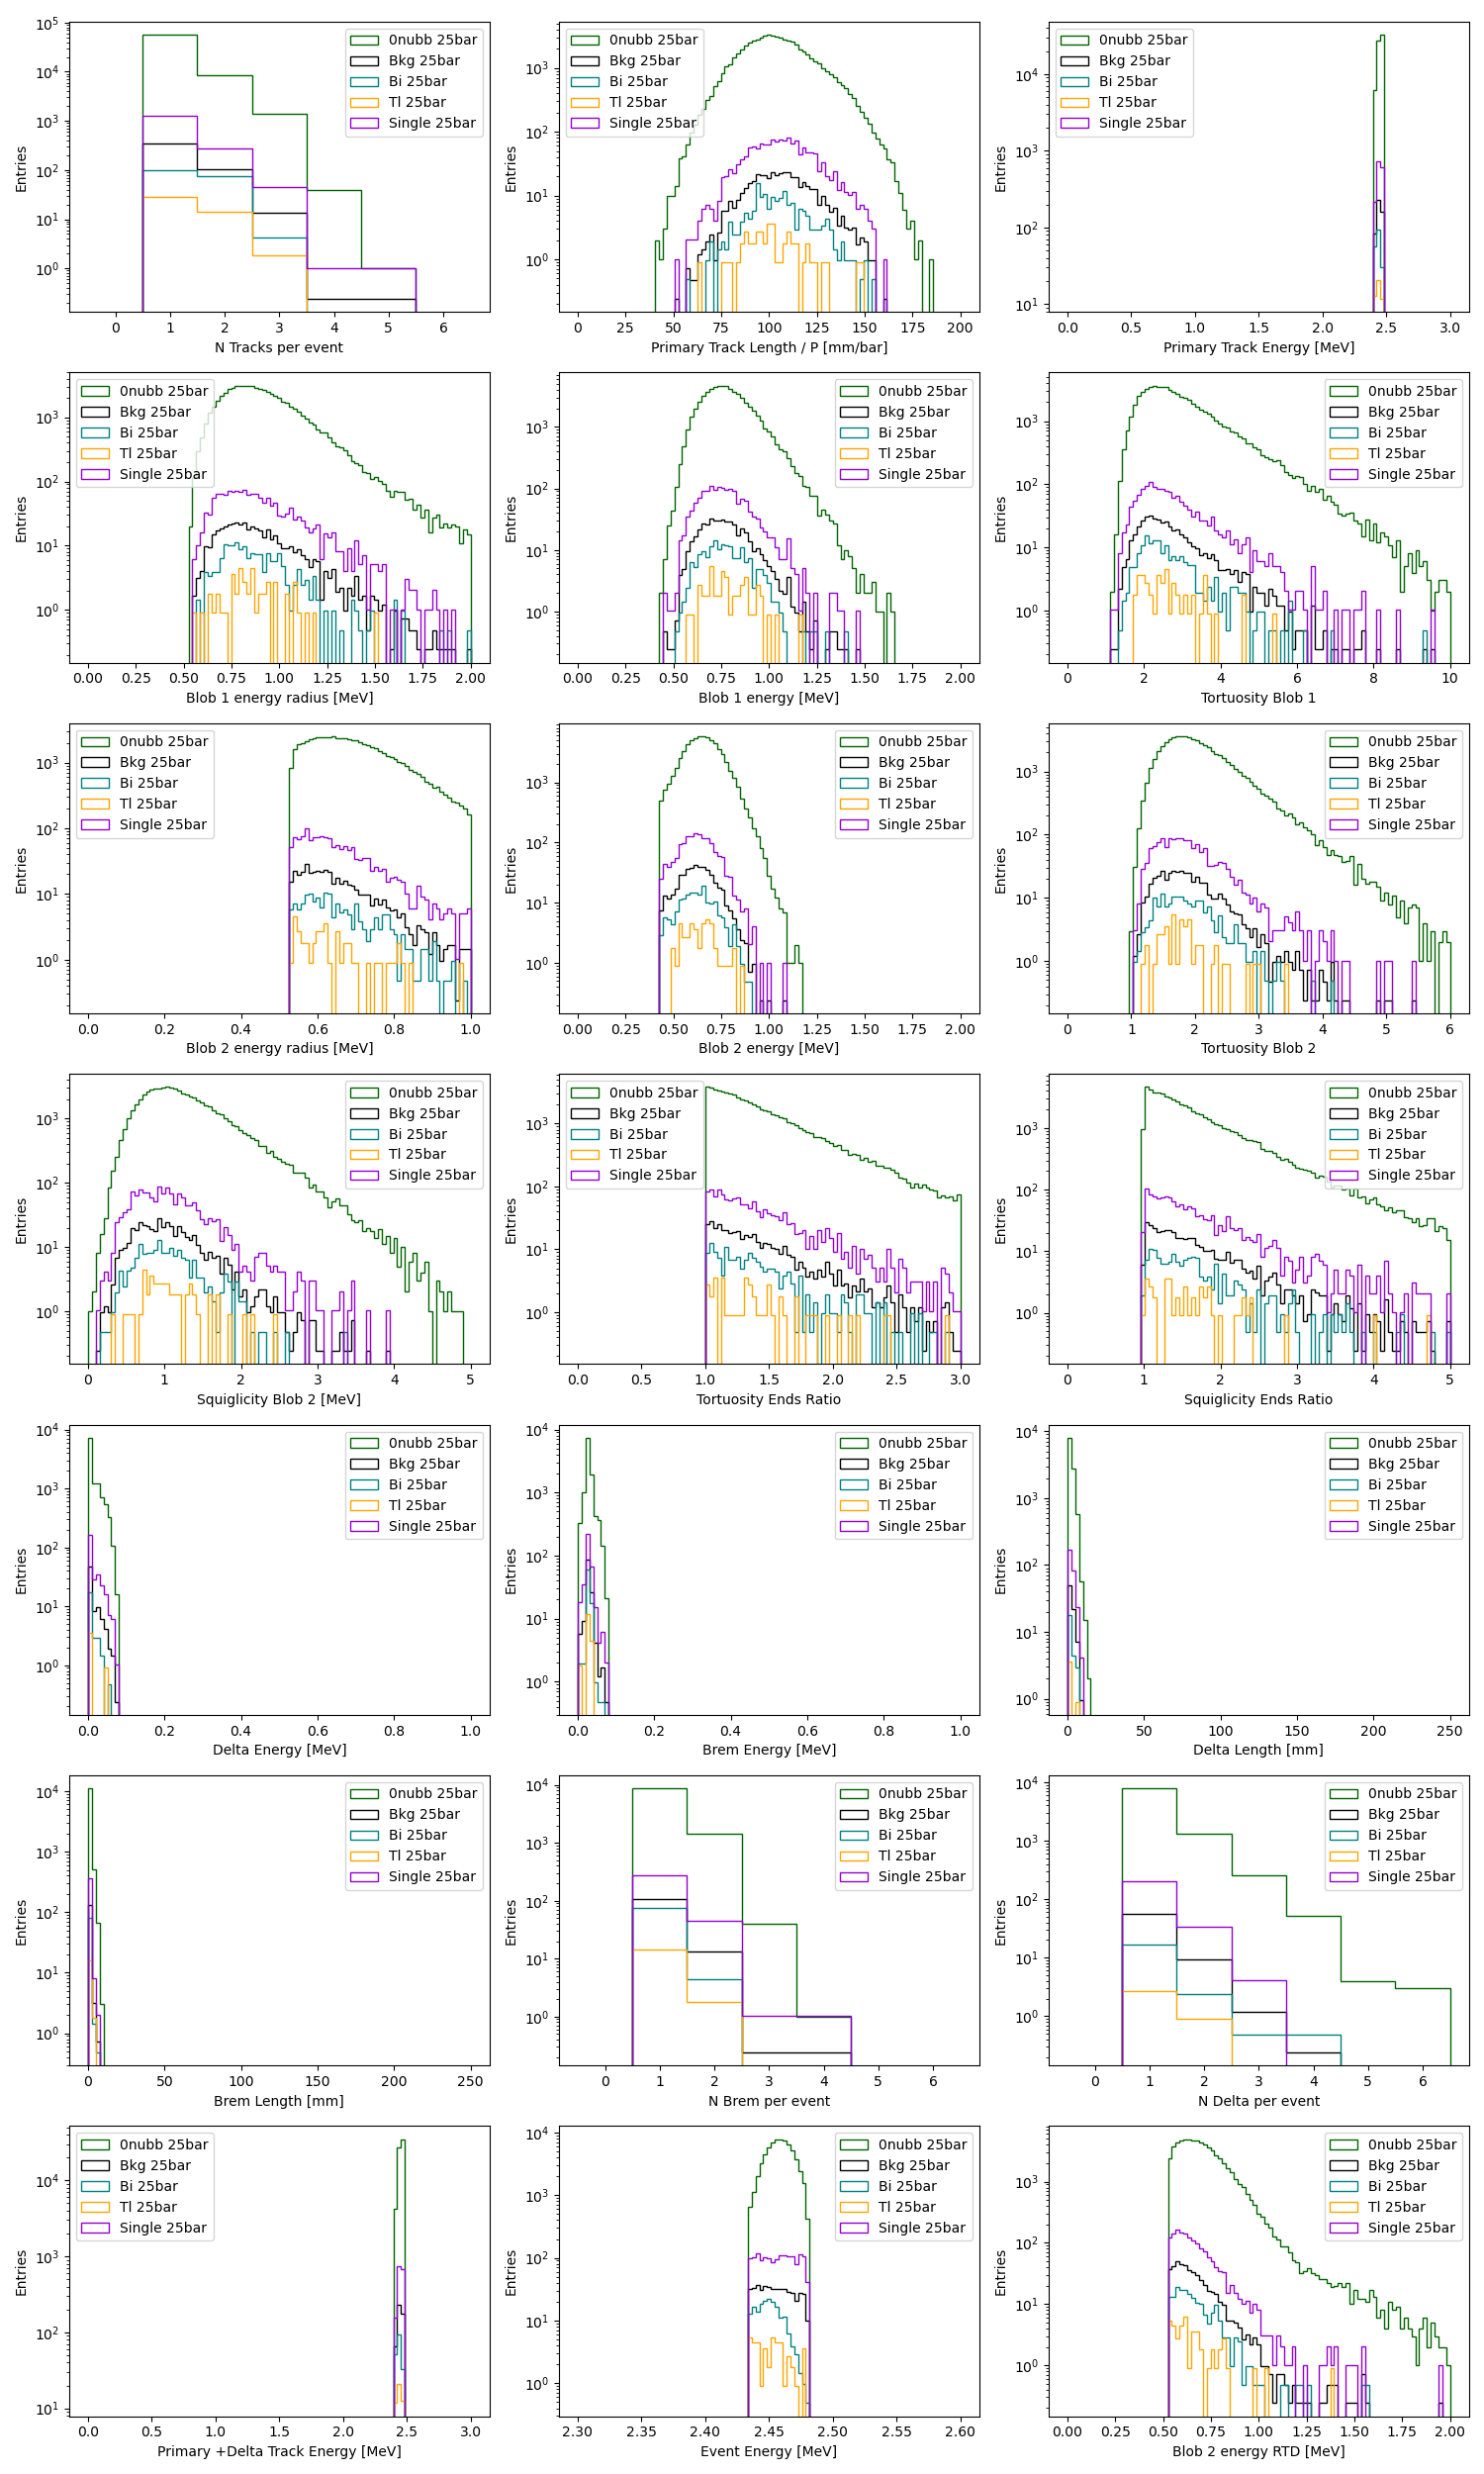

In [ ]:


def ApplyCuts(df_meta, df_primary, pressure, diffusion, mode, Eres):

    cuts = []

    # Apply containment
    df_meta = df_meta[df_meta.contained == True]
    df_primary = df_primary[df_primary.contained == True]
    df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)

    # This is common for all NEXT-tonne analysis
    if (mode == "next1t"):
        df_counts = GetNTracks(df_meta)
        df_counts = df_counts[df_counts.N_tracks == 1]
        df_meta = df_meta[df_meta["event_id"].isin(df_counts.event_id.unique())]
        df_primary = df_primary[df_primary["event_id"].isin(df_counts.event_id.unique())]

    # 1 bar
    if (pressure == 1):
       
        # 1bar no diff
        if (diffusion == "nodiff"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.45) & (df_primary.energy > 2.38)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.44) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.35)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 5%
        elif (diffusion == "5percent"):
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.37) & (df_primary.blob2RTD > 0.4) & (df_primary.blob1R > 0.34) &  (df_primary.energy > 2.35) & (df_primary.Tortuosity2 >1.3)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.44) & (df_primary.blob2 > 0.45) & (df_primary.blob1R > 0.34) &  (df_primary.energy > 2.35) & (df_primary.Tortuosity2 >1.3)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.4)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.25%
        elif (diffusion == "0.25percent"):
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.42) & (df_primary.blob2 > 0.45) & (df_primary.energy > 2.39)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.45) & (df_primary.blob2 > 0.54) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.47)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.1%
        elif (diffusion == "0.1percent"):
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.42) & (df_primary.blob2 > 0.45) & (df_primary.energy > 2.4) & (df_primary.length > 1000)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.44) & (df_primary.blob2 > 0.6)  & (df_primary.energy > 2.4) & (df_primary.length > 1000)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.45)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 10 He%
        elif (diffusion == "0.05percent"):
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.41) & (df_primary.blob2 > 0.4) & (df_primary.energy > 2.4) & (df_primary.length > 1000)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.48) & (df_primary.blob2 > 0.5) & (df_primary.energy > 2.4) & (df_primary.length > 600)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.45)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.0%
        elif (diffusion == "0.0percent"):
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2 > 0.18) & (df_primary.blob2R > 0.27) &  (df_primary.energy > 2.33) & (df_primary.length > 600)
            elif (mode == "nat"):
                cuts = (df_primary.blob2 > 0.35) & (df_primary.blob2R > 0.38) &  (df_primary.blob1 > 0.55) &  (df_primary.energy > 2.4) & (df_primary.length > 600)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.33)
            else:
                print("Unknown cut mode specified")

        else:
            print("Unknown diffusion specified")
    # -------------------------------------------------------------------------------------------------------------------------------------
    # 5bar
    elif (pressure == 5):
    
        # 5 bar no diff
        if (diffusion == "nodiff"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.42) & (df_primary.blob2 > 0.5) & (df_primary.energy > 2.4)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.45) & (df_primary.blob2 > 0.51) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.51)
            else:
                print("Unknown efficiency target specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 5bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.48) & (df_primary.blob1R > 0.5) & (df_primary.energy > 2.4) & (df_primary.Tortuosity2 > 1.3)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.4) &  (df_primary.blob2 > 0.56) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.51)
            else:
                print("Unknown cut mode specified")

        # 5bar 10% He
        elif (diffusion == "0.05percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2 > 0.67) & (df_primary.energy > 2.35) & (df_primary.blob1R > 0.6) 
            elif (mode == "nat"):
                cuts = (df_primary.blob2 > 0.71) & (df_primary.energy > 2.4) & (df_primary.length > 200)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.49)
            else:
                print("Unknown cut mode specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 10bar
    elif (pressure == 10):

        # 10bar no diff
        if (diffusion == "nodiff"):
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.575) & (df_primary.energy > 2.4)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.5) & (df_primary.blob2 > 0.57) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.56)
            else:
                print("Unknown cut mode specified")

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 10bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.51) & (df_primary.blob2 > 0.5) & (df_primary.blob1R > 0.6) & (df_primary.energy > 2.4) 
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.53) & (df_primary.blob2 > 0.55) &  (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.56)
            else:
                print("Unknown cut mode specified")

        # 10bar 10% He
        elif (diffusion == "0.05percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.44) & (df_primary.blob2 > 0.27) & (df_primary.energy > 2.37) 
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.45) & (df_primary.blob2 > 0.47) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.5)
            else:
                print("Unknown cut mode specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 15bar
    elif (pressure == 15):
        
        # 15bar no diff
        if (diffusion == "nodiff"):
        
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.52) & (df_primary.blob2 > 0.61) & (df_primary.energy > 2.4)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.56) & (df_primary.blob2 > 0.58) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.6)
            else:
                print("Unknown cut mode specified")

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 15bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.54) & (df_primary.blob2 > 0.56) & (df_primary.blob1 > 0.4) & (df_primary.energy > 2.35)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.54) & (df_primary.blob2 > 0.55) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.6)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 15bar 10% he
        elif (diffusion == "0.05percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts =  (df_primary.blob2 > 0.73) & (df_primary.energy > 2.38)
            elif (mode == "nat"):
                cuts =  (df_primary.blob2 > 0.75) & (df_primary.energy > 2.42)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.5)
            else:
                print("Unknown cut mode specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 25bar
    elif (pressure == 25):

        # 25bar no diff
        if (diffusion == "nodiff"):
        
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.56) & (df_primary.blob2 > 0.69) & (df_primary.energy > 2.4)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.57) & (df_primary.blob2 > 0.7) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.66)
            else:
                print("Unknown cut mode specified")

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 25bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.53) & (df_primary.blob2 > 0.43) & (df_primary.blob1 > 0.3) & (df_primary.energy > 2.4) 
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.45) & (df_primary.blob2 > 0.55) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.62)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 25bar 10% He
        elif (diffusion == "0.05percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.43) & (df_primary.blob2 > 0.43) & (df_primary.blob1 > 0.3) & (df_primary.energy > 2.4) 
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.45) & (df_primary.blob2 > 0.5) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.56)
            else:
                print("Unknown cut mode specified")

        else:
            print("Unknown diffusion specified")

    else:
        print("Unknown pressure specified")

    return df_meta, df_primary, cuts



fig, axs = plt.subplots(7, 3, figsize=(15, 25))

# mode = "nat"
mode = "enr"
# mode = "next1t"

if (mode =="enr"):
    print("Cuts are being optimized for enriched Xe")
    mass = 1
elif (mode == "next1t"):
    print("Cuts are being optimized for next1t analysis")
    mass = 1
else:
    print("Cuts are being optimized for natural Xe")
    mass = 10

nubb_cut    = PlotDistributions(nubb_meta,    "darkgreen",    f"0nubb {pressure}bar",   pressure, diff, mode, 1.0, 1,         axs, True)
Bkg_cut     = PlotDistributions(Bkg_meta,     "k",            f"Bkg {pressure}bar",     pressure, diff, mode, 1.0, sf_bkg,    axs, True)
Bi_cut      = PlotDistributions(Bi_meta,      "Teal",         f"Bi {pressure}bar",      pressure, diff, mode, 1.0, sf_bi,     axs, True)
Tl_cut      = PlotDistributions(Tl_meta,      "Orange",       f"Tl {pressure}bar",      pressure, diff, mode, 1.0, sf_tl,     axs, True)
single_cut  = PlotDistributions(single_meta,  "darkviolet",   f"Single {pressure}bar",  pressure, diff, mode, 1.0, sf_single, axs, True)


nubb_cut_num    = len(nubb_cut)
Bkg_cut_num     = len(Bkg_cut)
Bi_cut_num      = len(Bi_cut)
Tl_cut_num      = len(Tl_cut)
single_cut_num  = len(single_cut)

# Apply the assymetric energy res cut
nubb_cut_num   = ApplyAssymEResCut("nubb",   nubb_cut_num)
# Bkg_cut_num    = ApplyAssymEResCut("Bkg",    Bkg_cut_num)
# Bi_cut_num     = ApplyAssymEResCut("Bi",     Bi_cut_num)
# Tl_cut_num     = ApplyAssymEResCut("Tl",     Tl_cut_num)
# single_cut_num = ApplyAssymEResCut("Single", single_cut_num)

# Acutally use corrected amount for bkg cut
Bkg_cut_num = Bi_cut_num + Tl_cut_num + single_cut_num

nubb_eff, nubb_err      =  CalcEfficiency(nubb_cut_num,   nubb_events,   "nubb",   pressure, mass, True)
Bkg_eff, Bkg_err        =  CalcEfficiency(Bkg_cut_num,    Bkg_events,    "Bkg",    pressure, mass, True)
Bi_eff, Bi_err          =  CalcEfficiency(Bi_cut_num,     Bi_events,     "Bi",     pressure, mass, True)
Tl_eff, Bi_err          =  CalcEfficiency(Tl_cut_num,     Tl_events,     "Tl",     pressure, mass, True)
single_eff, single_err  =  CalcEfficiency(single_cut_num, single_events, "Single", pressure, mass, True)

# print("nubb: ", nubb_events, nubb_cut_num, 100*nubb_cut_num/nubb_events)
# print("Bkg: ", Bkg_events, Bkg_cut_num, 100-100*Bkg_cut_num/Bkg_events)
print("FOM:", FOM(nubb_eff, Bkg_eff))

print("Num Sig:", nubb_cut_num)
print("Num Bkg:", Bkg_cut_num)
print("Num Bi:", Bi_cut_num)
print("Num Tl:", Tl_cut_num)
print("Num single:", single_cut_num)

# Here lets write out the information to a file
output_df = pd.DataFrame( { "Pressure": pressure,         "Diffusion": diff, "cut": mode,
                           "nubb_gen": [nubb_events],     "nubb_cut": [nubb_cut_num],    "nubb_eff": [nubb_eff],
                           "Bkg_gen": [Bkg_events],       "Bkg_cut": [Bkg_cut_num],      "Bkg_eff": [Bkg_eff],
                           "Bi_gen": [Bi_events],         "Bi_cut": [Bi_cut_num],        "Bi_eff": [Bi_eff],
                           "Tl_gen": [Tl_events],         "Tl_cut": [Tl_cut_num],        "Tl_eff": [Tl_eff],
                           "single_gen": [single_events], "single_cut": [single_cut_num],"single_eff": [single_eff] })

display(output_df)
output_df.to_csv(f"../data/TrackRecoCuts/{pressure}bar_{diff}_{mode}.csv", index=False)

In [506]:
# 3D event display
%matplotlib widget



print(len(Tl_cut))


# evid = 26984036
# evid= Bkg_cut[14]
evid = Tl_cut[10]

event       = Bkg[Bkg.event_id == evid]
event.index = event.id
Track       = Bkg_Tracks[evid]
connection  = Bkg_connections[evid]
connection_count = Bkg_connection_counts[evid]
event_hits_true  = Bkg_true_hits[Bkg_true_hits.event_id == evid]
event_parts_true = Bkg_true_parts[Bkg_true_parts.event_id == evid]
event_diffused_hits = Bkg_diffused_hits[Bkg_diffused_hits.event_id == evid]

print(connection)

plt.figure()

# plt.hist2d(event.cumulative_distance, event.angle, bins = 20,cmin=3);
plt.plot(event[event.primary == 1].cumulative_distance, event[event.primary == 1].Tortuosity, color="k");

plt.xlabel("Cumalative Length [mm]")
plt.ylabel("Tortuosity")

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot xy projection
plot_tracks(axs[0], event['x'], event['y'], connection_count, 'X', 'Y', Track)
axs[0].scatter(event_hits_true['x'], event_hits_true['y'], marker='o',c="k", s=0.1)

# Plot xz projection
plot_tracks(axs[1], event['x'], event['z'], connection_count, 'X', 'Z', Track)
axs[1].scatter(event_hits_true['x'], event_hits_true['z'], marker='o',c="k", s=0.1)

# Plot yz projection
plot_tracks(axs[2], event['y'], event['z'], connection_count, 'Y', 'Z', Track)
axs[2].scatter(event_hits_true['y'], event_hits_true['z'], marker='o',c="k", s=0.1)

plt.tight_layout()



50


KeyError: np.int64(6900348)

/Users/krishan.mistry/Library/CloudStorage/OneDrive-UTArlington/Code/ATPC/notebooks/../scripts/TrackReconstruction_functions.py:710: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cut_data["energy"] += cut_data["energy"] / cut_data["energy"].sum() * removed_energy


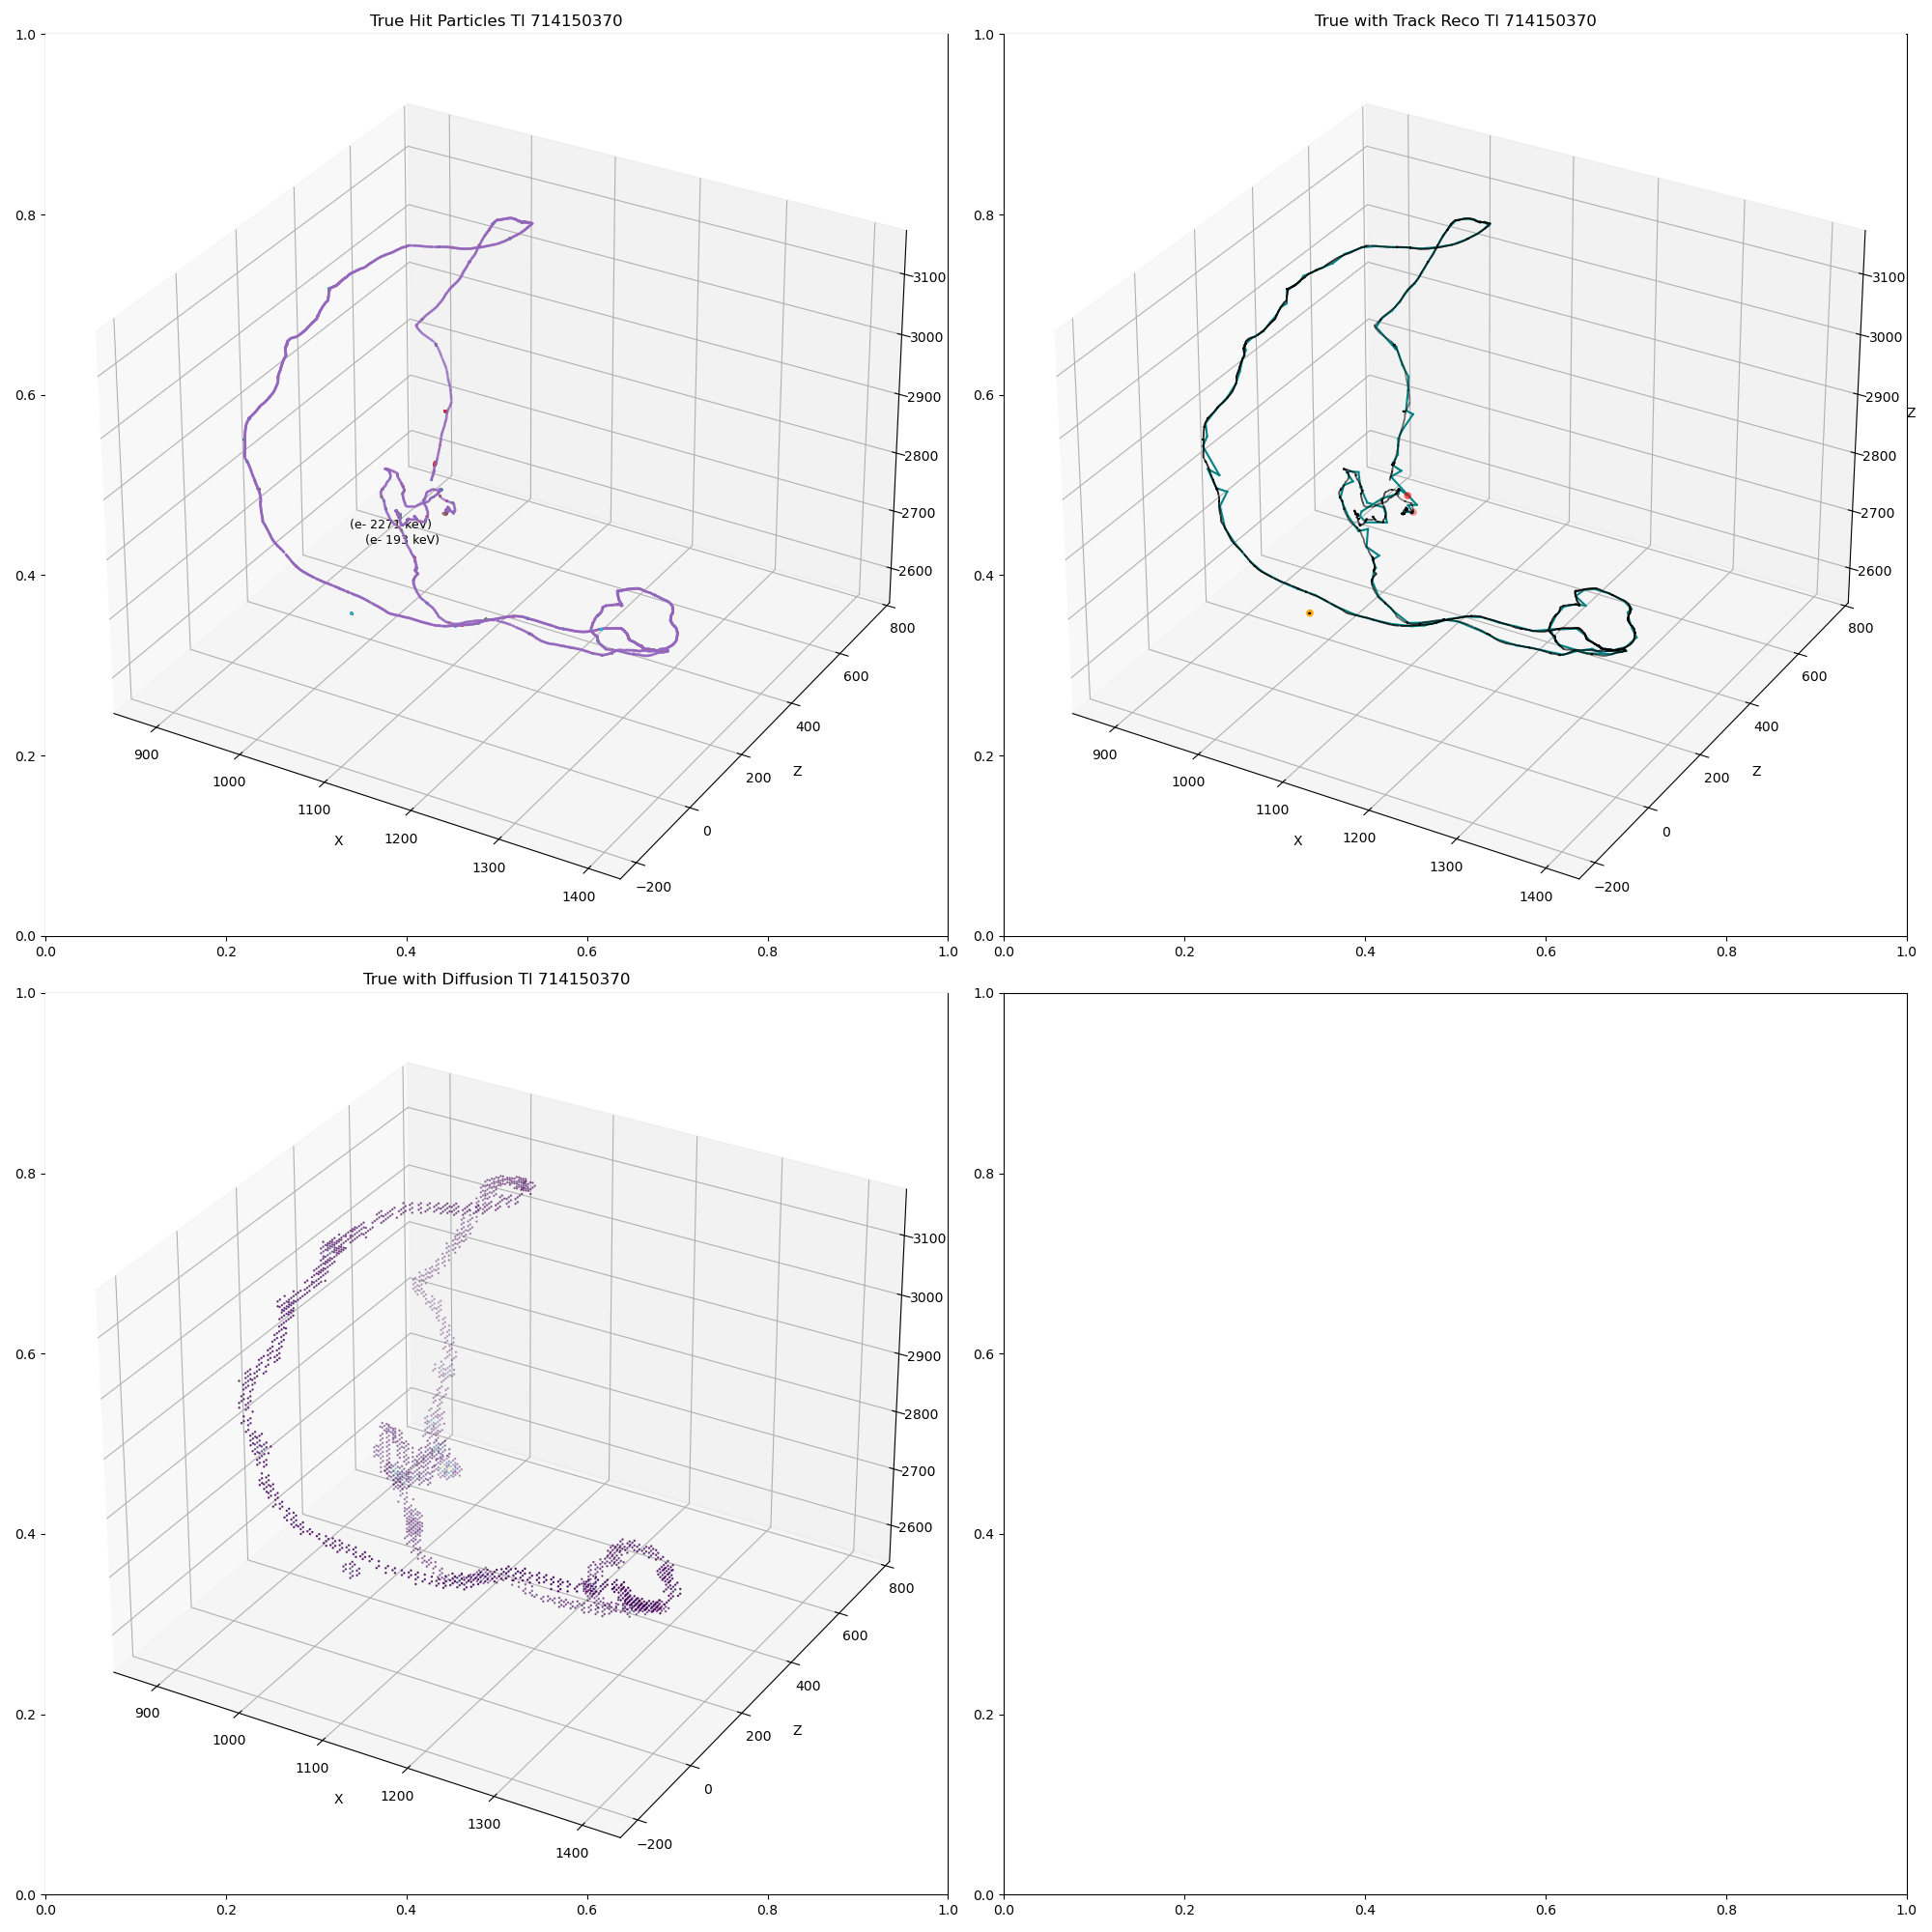

In [ ]:
# 3D Projection
# plt.figure()
# Create two side-by-side subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# --- First plot: 3D Projection ---
ax_3D = fig.add_subplot(221, projection='3d')
for p in event_hits_true.particle_id.unique():

    ax_3D.scatter(event_hits_true[event_hits_true.particle_id == p]['x'], 
                  event_hits_true[event_hits_true.particle_id == p]['y'], 
                  event_hits_true[event_hits_true.particle_id == p]['z'], 
                  marker='o', s=1)

for index, row in event_parts_true[event_parts_true.kin_energy > 0.1].iterrows():
    Energy = round(row["kin_energy"] * 1000)
    particle_name = row["particle_name"]

    if particle_name == "gamma":
        continue

    ax_3D.text(row["initial_x"], row["initial_y"], row["initial_z"] + 3000, 
               f"({particle_name} {Energy} keV)", fontsize=9, ha='right', va='bottom', color='black')


ax_3D.set_title(f"True Hit Particles {event.Type.iloc[0]} {evid}")
ax_3D.set_xlabel("X")
ax_3D.set_ylabel("Y")
ax_3D.set_ylabel("Z")

# --- Second plot: Example scatter plot ---
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(event_hits_true['x'], event_hits_true['y'], event_hits_true['z'],c="k", s=0.1)
plot_tracks_3D(ax2, event['x'], event['y'], event['z'], connection_count, Track)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_ylabel("Z")
ax2.set_title(f"True with Track Reco {event.Type.iloc[0]} {evid}")


event_diffused_hits = CutandRedistibuteEnergy(event_diffused_hits, 0.0004)
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(event_diffused_hits['x'], event_diffused_hits['y'], event_diffused_hits['z'],c=event_diffused_hits['energy'], s=0.5)
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_ylabel("Z")
ax3.set_title(f"True with Diffusion {event.Type.iloc[0]} {evid}")


plt.tight_layout()
plt.show()


In [ ]:
display(event_parts_true[event_parts_true.kin_energy>0.1])
display(event_parts_true)

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
253536,714150370,4,e-,0,1,1641.556519,-2651.889648,-916.183167,0.000334,1641.428467,...,-0.244774,1.083814,0.549370,0.000000,0.000000,-0.000000,0.829708,0.586734,RadioactiveDecay,eIoni
253545,714150370,3,anti_nu_e,0,1,1641.556519,-2651.889648,-916.183167,0.000334,-90614.429688,...,-0.141237,-0.416946,0.135903,-0.141237,-0.416946,0.135903,0.460718,300940.187500,RadioactiveDecay,Transportation
253547,714150370,14,gamma,0,2,1641.556519,-2651.889648,-916.183167,0.000334,1639.557739,...,0.420886,0.271214,0.100760,-0.000000,-0.000000,-0.000000,0.510739,91.322876,RadioactiveDecay,phot
253553,714150370,20,e-,0,14,1639.557739,-2636.039062,-961.389404,0.304954,1639.568726,...,0.295742,0.318440,-0.195957,-0.000000,-0.000000,-0.000000,0.187848,0.072187,phot,eIoni
253554,714150370,19,e-,0,14,1655.431885,-2620.145508,-918.682373,0.142283,1655.434448,...,0.034754,0.348887,0.071588,0.000000,0.000000,-0.000000,0.112840,0.035170,compt,eIoni
253558,714150370,15,e-,0,14,1658.434692,-2641.013672,-912.142578,0.068652,1658.455200,...,0.463622,-0.021282,0.201029,0.000000,-0.000000,0.000000,0.207980,0.088073,compt,eIoni
253560,714150370,27,gamma,0,13,1641.556519,-2651.889648,-916.183167,0.000334,1612.036133,...,-0.539068,0.222433,0.006145,0.000000,-0.000000,0.000000,0.583188,37.634396,RadioactiveDecay,phot
253567,714150370,35,e-,0,27,1612.036133,-2640.566650,-915.384583,0.125868,1612.046753,...,0.393331,0.130124,0.100893,0.000000,0.000000,-0.000000,0.154539,0.045250,phot,eIoni
253569,714150370,33,e-,0,27,1610.887085,-2638.282715,-916.302734,0.116807,1610.896362,...,0.116839,0.341644,-0.232557,0.000000,0.000000,0.000000,0.156515,0.058176,compt,eIoni
253574,714150370,28,e-,0,27,1610.252563,-2638.972900,-915.826355,0.113299,1610.244263,...,-0.555741,-0.076922,0.142330,0.000000,0.000000,0.000000,0.261104,0.098547,compt,eIoni


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
253535,714150370,1,Tl208,1,0,1641.556519,-2651.889648,-916.183167,0.000000,1641.556519,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000e+00,none,RadioactiveDecay
253536,714150370,4,e-,0,1,1641.556519,-2651.889648,-916.183167,0.000334,1641.428467,...,-0.244774,1.083814,0.549370,0.0,0.0,-0.0,0.829708,5.867342e-01,RadioactiveDecay,eIoni
253537,714150370,5,gamma,0,4,1641.426270,-2651.728271,-916.217407,0.001694,1641.411865,...,-0.018991,0.008576,0.008367,-0.0,0.0,0.0,0.022455,1.698553e-02,eBrem,phot
253538,714150370,12,e-,0,5,1641.411865,-2651.721924,-916.211060,0.001750,1641.411865,...,0.001936,-0.005993,0.004459,-0.0,-0.0,0.0,0.000058,7.921150e-08,phot,msc
253539,714150370,11,e-,0,5,1641.411865,-2651.721924,-916.211060,0.001750,1641.411865,...,-0.006240,-0.004370,0.001232,-0.0,-0.0,0.0,0.000058,7.921150e-08,phot,msc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254099,714150370,550,e-,0,150,951.456665,592.422180,-422.071411,11.255721,951.455811,...,-0.006378,0.005217,-0.005949,-0.0,0.0,-0.0,0.000101,4.412844e-03,eIoni,eIoni
254100,714150370,549,e-,0,150,951.522400,593.069214,-421.230408,11.242509,951.526489,...,0.029369,0.007868,-0.021459,-0.0,0.0,-0.0,0.001353,4.898647e-02,eIoni,eIoni
254101,714150370,149,e-,0,44,955.314697,573.808594,-428.363617,11.122488,955.307312,...,-0.030393,0.000966,-0.018545,0.0,0.0,-0.0,0.001240,6.039938e-02,eIoni,eIoni
254102,714150370,148,e-,0,44,956.773376,565.980591,-430.914459,11.094099,956.781982,...,0.032538,0.010172,-0.016402,-0.0,0.0,-0.0,0.001399,5.432243e-02,eIoni,eIoni


In [ ]:
# Save all the background events




# for i, evid in enumerate(Tl_topology_evts):
#     event = Tl[Tl.event_id == evid]
#     event.index = event.id
#     Track = Tracks_Tl[evid]
#     connection = connections_Tl[evid]
#     connection_count = connection_counts_Tl[evid]

#     # Tortuosity plot
#     plt.figure()
#     plt.plot(event[event.primary == 1].cumulative_distance, event[event.primary == 1].Tortuosity, color="k")
#     plt.xlabel("Cumulative Length [mm]")
#     plt.ylabel("Tortuosity")
#     plt.title(f"Event {evid}")
#     plt.savefig(f"plots/Dave/SelectedBkg/Background_Evt{evid}_Tortuosity.pdf")

#     if i == 0:
#         plt.show()  # Show only the first figure
#     else:
#         plt.close()  # Close the figure to avoid displaying

#     # Create subplots for 3D projections
#     fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#     # Plot projections
#     plot_tracks(axs[0], event['x'], event['y'], connection_count, 'X', 'Y', Track)
#     plot_tracks(axs[1], event['x'], event['z'], connection_count, 'X', 'Z', Track)
#     plot_tracks(axs[2], event['y'], event['z'], connection_count, 'Y', 'Z', Track)

#     fig.suptitle(f"Event {evid}")

#     plt.tight_layout()
#     plt.savefig(f"plots/Dave/SelectedBkg/Background_Evt{evid}.pdf")
    
#     plt.close(fig)  # Close the figure after saving to prevent display


# def SaveInteractive3D(event_hits, filename):
#     fig = px.scatter_3d(event_hits, x='x', y='y', z='z', color='energy',
#                          title="3D Event Display", color_continuous_scale="Spectral")
    
#     fig.update_layout(scene=dict(
#         xaxis_title="X [mm]",
#         yaxis_title="Y [mm]",
#         zaxis_title="Z [mm]",
#         bgcolor='black',
#         xaxis=dict(
#             showbackground=False,  # Remove X plane
#             showgrid=False,
#             zeroline=False
#         ),
#         yaxis=dict(
#             showbackground=False,  # Remove Y plane
#             showgrid=False,
#             zeroline=False
#         ),
#         zaxis=dict(
#             showbackground=False,  # Remove Z plane
#             showgrid=False,
#             zeroline=False
#         ),
#     ))

#     pio.write_html(fig, filename)  # Save as interactive HTML file

# for i, evid in enumerate(Tl_topology_evts):
#     event = Tl[Tl.event_id == evid]

#     SaveInteractive3D(event, f"plots/Dave/SelectedBkg/Background_Evt{evid}_3D.html")

